# Data collection:

##  Get the list of movies:

* Get a list of Wikipedia URLs from movies.html

In [522]:
from bs4 import BeautifulSoup
import requests
import time
import random
f1 = open("HW3 ADM/movies3.html")
f3 = open("HW3 ADM/movies1.html")
f2 = open("HW3 ADM/movies2.html")
soup = BeautifulSoup(f1)
soup1 = BeautifulSoup(f3)
soup2 = BeautifulSoup(f2)
listUrl_Movies1=[]
listUrl_Movies2=[]
listUrl_Movies3=[]
for link in soup.select('a'):
    listUrl_Movies3.append(link.text)
for link in soup2.select('a'):
    listUrl_Movies2.append(link.text)
for link in soup1.select('a'):
    listUrl_Movies1.append(link.text)

In [524]:

totalMovies=len(listUrl_Movies1)+len(listUrl_Movies2)+len(listUrl_Movies3)
print(totalMovies)

30000


## Crawl Wikipedia:

* Function 'downloadFile' that allow to download html file from URL list

We downloaded all movies. 10 000 per person. Every person download file from:
* listUrl_Movies1/ listUrl_Movies2/ listUrl_Movies3

In [ ]:
def downloadFile():

    for index in range(len(listUrl_Movies3)):
        #set time=20 mintes
        t2=1200
        try:
            #wait 5 seconds bettween every request
            t1 = random.randint(1,5)
            time.sleep(t1)
            url=listUrl_Movies3[index]
            response = requests.get(url)
            name="aritcle_"
            extension=".html"
            file="{}{}{}".format(name,index,extension)
            with open(file,'wb') as f: 
                f.write(response.content)  

        except response.status_code as e:
            print("exception")
            #error=492 is error that occurs when we have done a limit of request
            if e==492:
                #wait 20 minutes 
                time.sleep(t2)
                downloadFile(index+1)
            elif e==200:
                soup = BeautifulSoup(listUrl_Movies3[1])
                
                with open(file,'w') as f: 
                    f.write(soup.text)
                downloadFile(index+1)
            else:
                continue



In [ ]:
downloadFile()

## Parse downloaded pages:

* Create .tsv files for every html file and put them in tsv directory. These file contains data (title,intro,plot and infobox infos) as written in hw track. About starring in infobox, we saved every actor in a list (to do bonus section).

In [ ]:
import csv
import pandas as pd
import os.path
#define column of our dataframe
df=pd.DataFrame(columns=['title', 'intro', 'plot','film_name','producer','director','writer','starring','music','release date','runtime','country','language','budget'])


for index in range(totalMovies):
    print(index)
    title=''
    plot=''
    intro=''
    title_name='NA'
    producer='NA'
    director='NA'
    writer='NA'
    starring=['NA']
    music='NA'
    release_date='NA'
    runtime='NA'
    country='NA'
    language='NA'
    budget='NA'
    
    
    #define name of the file that we want to find (in my case: in the same directory)
    name="article_"
    extension=".html"
    file="{}{}{}".format(name,index ,extension)
    
    #check if this file exists
    if not os.path.isfile("HW3 ADM/"+file):
        continue
        
    #open file   
    response2 = open("HW3 ADM/"+file)
    soup = BeautifulSoup(response2)
    #take title.
    title=soup.title.text.rsplit(' ', 2)[0]
    
    #take all p in intro(firt section)
    #print(soup.find('span', attrs={'class': 'mw-headline'}))
    if soup.find('span', attrs={'class': 'mw-headline'}):
        heading = soup.find('span', attrs={'class': 'mw-headline'})
        paragraphs = heading.find_all_previous('p')
        for p in paragraphs: 
            intro = p.text + intro
            
     
        #take all p in 'plot'(second section)
        b=True
        #print(soup.find('span', attrs={'class': 'mw-headline'}))
        if soup.find('span', attrs={'class': 'mw-headline'}): 
            
            heading = soup.find('span', attrs={'class': 'mw-headline'})
            
            for item in heading.parent.nextSiblingGenerator():
                
                if item.name=='h2':
                    break
                if hasattr(item, "text"):
                    
                    plot+=item.text

        else:
            plot="NAN"
    
    else:
        intro="NAN"
        plot="NAN"
    
    
    #Get info about infobox from every page and put them in respective sections in tsv file  
    if soup.find('table', attrs={'class': 'infobox vevent'}):
        
        table = soup.find('table', attrs={'class': 'infobox vevent'})  
    
        if table.find('th', attrs={'class': 'summary'}):
        
            x=table.find('th', attrs={'class': 'summary'})
            title_name=x.text.strip()
        
        for cell in table.find_all('th'):
        
            if cell.find_next_sibling('td'):
                a=cell.find_next_sibling('td')
                if cell.text.strip()=='Directed by':
                    director=a.text.strip()
                elif cell.text.strip()=='Produced by':
                
                    producer=a.text.strip()
                elif cell.text.strip()=='Written by':
                
                    writer=a.text.strip()
                elif cell.text.strip()=='Starring':
                    listStarring=[]
                    for link in a.select('a'):
                        
                        listStarring.append(link.text)
                    starring=listStarring
                    #print(starring)
                elif cell.text.strip()=='Music by':
                
                    music=a.text.strip()
                elif cell.text.strip()=='Release date':
                    release_date=a.text.strip()   
                elif cell.text.strip()=='Running time':
                
                    runtime=a.text.strip()
                elif cell.text.strip()=='Country':
              
                    country=a.text.strip()
                elif cell.text.strip()=='Language':
              
                    language=a.text.strip()
                elif cell.text.strip()=='Budget':
              
                    budget=a.text.strip()
            else:
                continue
            
    
    #put all infos in movie list
    movie=[title,intro,plot,title_name,producer,director,writer,starring,music,release_date,runtime,country,language,budget]
    #update dataframe with this list
    extension2=".tsv"
    file="{}{}{}".format(name,index,extension2)
   
    movieTitle=["title","intro","plot","title_name","producer","director","writer","starring","music","release_date","runtime","country","language","budget"]
    with open("HW3 ADM/tsv_new/"+file, 'w', newline='') as f_output:
        tsv_output = csv.writer(f_output, delimiter='\t')
        tsv_output.writerow(movieTitle)
        tsv_output.writerow(movie)
    df.loc[index] = movie

# Search Engine:

## Search engine 1: Conjunctive query 

* Create tsv files with preporcessed text. We have preprocessed all texts in tsv file (that we have just created) and we have put them in other tsv files tsv_correct directory. For every section we have a list of all word that are in respective section. We have also deleted duplicated words.

In [ ]:
import string
import csv

from shutil import move
from nltk.tokenize import RegexpTokenizer
#create tsv file in 'tsv_correct' directory wehere we have preprocessed the tsv file (just created in parser.py)
tokenizer = RegexpTokenizer(r'\w+')
name="article_"
extension2=".tsv"
exclude = string.punctuation
for index in range(totalMovies):
    print(index)


    file="{}{}{}".format(name,index,extension2)
    with open("HW3 ADM/tsv/"+file,"r") as tsvfile, open("HW3 ADM/tsv_correct/"+file,"w") as outfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        tsvwriter = csv.writer(outfile, delimiter="\t")
        for row in tsvreader:
            for i in range(len(row)):
                #take every words, deleting ountuaction and other symbols
                row[i] = tokenizer.tokenize(row[i])
                #remove duplicate case-insensitive elements
                row[i]= list(set(map(str.lower, row[i])))
                #row[i] = row[i].translate({ord(c): None for c in string.punctuation})
                
            tsvwriter.writerow(row)
            

* We created a vocabulary that we stored in vocabulary.tsv file. Here we have all words thate we have in all tsv file (in intro and plot section as wirtten in hw track). Every word match with a unique term_id. This term_is is a simple counter.

In [ ]:
import ast
from itertools import islice
import csv
#create vocabulary and save it on vocabulary.tsv
            

dict1 = dict()
term_id=0
present=False
with open('HW3 ADM/ind/vocabulary.tsv', 'w', newline='') as f_output:
        tsv_vocabulary = csv.writer(f_output, delimiter='\t')
        tsv_vocabulary.writerow(['word','term_id'])
        name="article_"
        extension2=".tsv"
        
        for index in range(totalMovies):
           
            print(index)
            file="{}{}{}".format(name,index,extension2)
            with open("HW3 ADM/tsv_correct/"+file,"r") as tsvfile:
                data_list = list(csv.reader(tsvfile, delimiter="\t"))
                tsvreader = csv.reader(tsvfile, delimiter="\t")
                #put in intro a list of all words that we have in intro of i-th page
                intro=data_list[1][2]
                intro = ast.literal_eval(intro)
                #put in plot a list of all words that we have in plot of i-th page
                plot=data_list[1][1]
                plot = ast.literal_eval(plot)
                
                #put in text, a list that contains all words that are in plot and word for every page (no duplicate)
                text=plot+intro
                text= list(set(map(str.lower, text)))
                
                #put in dict1 every words with its term_id (no duplicate)
                for i in text:
                    if i in dict1:    
                        continue
                    else:
                        dict1[i]=term_id
                        term_id+=1
                
        #put dict1 element in vocabulary.tsv file                
        for key, val in dict1.items():
                    tsv_vocabulary.writerow([key, val])




### Create index:

* Then we created the index from vocabulary.tsv and from all preprocessed tsv files.  
For every words (in plot and intro) in all prorocessed tsv files, we found their term_id (from vocabulary) and for evey term_id we match a list of document where repsective word is present. 
* This index was used to search query words in every document about 1st and 2nd search engines. We saved it into index.tsv

In [ ]:
import ast
from itertools import islice
import csv

#create index and save it on index.tsv                

dict2 = {}
count=0
present=False
with open('HW3 ADM/tsv/vocabulary.tsv', 'r', newline='') as f_output:
        tsv_vocabulary = list(csv.reader(f_output, delimiter='\t'))
        name="article_"
        extension2=".tsv"
        h=0
        for row in tsv_vocabulary:
            
            dict2[row[1]]=[]
        for index in range(totalMovies):
            
            print(index)
            file="{}{}{}".format(name,index,extension2)
            with open("HW3 ADM/tsv_correct/"+file,"r") as tsvfile:
                data_list = list(csv.reader(tsvfile, delimiter="\t"))
                tsvreader = csv.reader(tsvfile, delimiter="\t")
                intro=data_list[1][1]
                intro = ast.literal_eval(intro)
                plot=data_list[1][2]
                plot = ast.literal_eval(plot)
                text=plot+intro
                text= list(set(map(str.lower, text)))
                
                #for evry words in plot adn intro (for every page) we get every word. From every word we get its term_id and put it whit their occurences (document_id) in dict2
                for i in text:
                    for row in tsv_vocabulary:
                        if i==row[0]:
                            doc="document_"
                            name2="{}{}".format(doc,index)
                            
                            dict2[row[1]].append(name2)
                            break
                        else:
                            continue
                            
        #put dict2 in index.tsv file. In. evry row we have a single term_id with occurences of respective word.
        with open('HW3 ADM/ind/index1.tsv', 'w', newline='') as f_output:
            tsv_vocabulary = csv.writer(f_output, delimiter='\t')           
            for key, val in dict2.items():
                tsv_vocabulary.writerow([key, val])           
                    




* Then we create getDocuments function that allow to find all documents where the input query is present.
This fucntion has two parameters in input: words that is our query and index is number of indext that we consider to do specific search engine. 
This function return a list of documents that contain input query based on index.
* We use index1 about search engine 1 and search engine 2; index2 about search engine 3.

* This function is used from all three different search engines

In [520]:
import csv
import sys
import ast
#define function that allows us to calculate a list that is an intersection from two list
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
def getDocuments(words,index):


    #we use dict3 to store term_id and its respective documents_id
    dict3={}
    ##we use dict4 to store evry word and its respective documents_id
    dict4={}
    csv.field_size_limit(sys.maxsize)
    #in listWords we have a list that contains all words about inout query
    listWords = words.split()
    listWords=[x.lower() for x in listWords]
    
    #with vocabulary.tsv we start to build a dict3 with term_id for every words in wordsList
    with open('HW3 ADM/tsv/vocabulary.tsv', 'r', newline='') as f_output:
        tsv_vocabulary = list(csv.reader(f_output, delimiter='\t'))
        for word in listWords:
            word=word.lower()
            present=False
            for row in tsv_vocabulary:
                if word.lower()==row[0]:
                    dict3[row[1]]=[]
                    present=True
            #case where word is not in vocabulary
            if present==False:
                dict4[word]=[]
        indexFile="index"+str(index)+".tsv"
        #we continue to match documnets_id to every term_id in dict3
        with open('HW3 ADM/tsv/'+indexFile, 'r', newline='') as f_output:
            tsv_index = list(csv.reader(f_output, delimiter='\t'))
            for k in dict3.keys():  
                for row in tsv_index:
                    if row[0]==k:
                        dict3[k]=row[1]
                        continue


        #finally we build dict4 where evry word matches to respective documents_id
        for k in dict3.keys():

            for row in tsv_vocabulary:
                if k==row[1]:
                    dict4[row[0]]=dict3[row[1]]

        document=ast.literal_eval(dict4[listWords[0]])         
        #return "no results" if any query words isn't at least in one document
        for i in dict4.values():
            if not i:
                error='No results'
                return error
        #interection between every list in values dict4. In this way we have documnets_id where all words (in query input) are present
        for value in dict4.values():
            document=intersection(document,ast.literal_eval(value))
        
    return document

* searchEngine1 function allow to do the first search engine. It take an input query and returns a dataframe that contains the result. In this function we call getDocuments and for every document that contains input query we get some info from not preprocessed tsv file in tsv directory.

* This result is a list of movies and for every movies we show only intro, title and URL link.


In [502]:
import pandas as pd



def searchEngine1(words):
        #build the dataframe with info for every documents_id
    document=getDocuments(words,1)
    if document=='No results':
        return document
    df=pd.DataFrame(columns=['title', 'intro', 'url'])
    for index in range(len(document)):
        #get id of documnets_is
        numberDocument=document[index][9:]
        #get wikipedia url
        url=listUrl_Movies3[int(numberDocument)]
        name="article_"
        extension2=".tsv"
        index=int(numberDocument)
        file="{}{}{}".format(name,index,extension2)
        #get info about title and intro for evert film that corresponds to every documents_id
        with open('HW3 ADM/tsv/'+file, 'r', newline='') as f_output:
            tsv_index = list(csv.reader(f_output, delimiter='\t'))
            title=tsv_index[1][3]
            intro=tsv_index[1][1]
            film=[title,intro,url]
            #put all info for every film in a single row of df dataframe
            df.loc[index] = film
    return df

### Execute the query:

In [505]:
query='enormous damage unless something is done immediately'
searchEngine1(query)

,title,intro,url
20012,"Digby, the Biggest Dog in the World","\nDigby, the Biggest Dog in the World is the t...","https://en.wikipedia.org/wiki/Digby,_the_Bigge..."


## Search engine 2: Conjunctive query & Ranking score


* Create tsv files from not preprocessed files. This is the same process that we've done for tsv file in tsv_correct dirctory. But in this case, we considerated also duplicate words. This is important to calculate TfIdf about second search engine.

* These tsv file are stored in tsv_correct2 directory

In [ ]:


import string
import csv
from shutil import move
from nltk.tokenize import RegexpTokenizer
#create tsv file in 'tsv_correct' directory wehere we have preprocessed the tsv file (just created in parser.py)
tokenizer = RegexpTokenizer(r'\w+')
name="article_"
extension2=".tsv"
exclude = string.punctuation
for index in range(totalMovies):
    print(index)


    file="{}{}{}".format(name,index,extension2)
    with open("HW3 ADM/tsv/"+file,"r") as tsvfile, open("HW3 ADM/tsv_correct2/"+file,"w") as outfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        tsvwriter = csv.writer(outfile, delimiter="\t")
        for row in tsvreader:
            for i in range(len(row)):
                #take every words, deleting ountuaction and other symbols
                row[i] = tokenizer.tokenize(row[i])
                #remove duplicate case-insensitive elements
                row[i]= list(map(str.lower, row[i]))
                #row[i] = row[i].translate({ord(c): None for c in string.punctuation})
                
            tsvwriter.writerow(row)
            

* From these tsv file that we have just created, we create a dataframe 'df2'.
This dataframe contains the TfIdf value for every match between word-document. Its columns are all different words that we have preproccesed tsv file (in intro and plot). Its rows are different document that are identified by document_id (id stays for the number of movies, example:document_222 stays for article_222.html/article_222.tsv)


In [ ]:
import ast
from itertools import islice
import csv
import sys
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
csv.field_size_limit(sys.maxsize)
#create index and save it on index.tsv                

dict2 = {}
count=0
present=False
documents=[]
name='article_'
extension2='.tsv'
with open('HW3 ADM/tsv/vocabulary.tsv', 'r', newline='') as f_output:
        tsv_vocabulary = list(csv.reader(f_output, delimiter='\t'))
        for index in range(totalMovies):
            print(index)
            file="{}{}{}".format(name,index,extension2)
            with open("HW3 ADM/tsv_correct2/"+file,"r") as tsvfile:
                data_list = list(csv.reader(tsvfile, delimiter="\t"))
                tsvreader = csv.reader(tsvfile, delimiter="\t")
                intro=data_list[1][1]
                intro = ast.literal_eval(intro)
                plot=data_list[1][2]
                plot = ast.literal_eval(plot)
                text=plot+intro
                text=list(map(str.lower, text))
                documents.append(' '.join(text))
                #print(documents)
                # text2= list(set(map(str.lower, text)))
                
                
        vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
      
        vectors = vectorizer.fit_transform(documents)
        #print(vectors)
        feature_names = vectorizer.get_feature_names()
        dense = vectors.todense()
        denselist = dense.tolist()
        df2 = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df2

### Inverted index:

* We created a new dictionary that has term_id as key (that we get from vocabulary by every words) and an array as value. This array contains a list of matching between document and respective TfIdf for respective word in this document. For example:
key: "122", value:[[dcoument_12,0.02],[dcoument_18,0.22]]

In [ ]:
import ast
from itertools import islice
import csv
import sys
csv.field_size_limit(sys.maxsize)
#create index and save it on index.tsv                
dict={}
dict2 = {}
count=0
present=False


#print('step 2')
name="article_"
extension2=".tsv"
h=0
for row in tsv_vocabulary:
    h+=1
    dict[row[0]]=row[1]
    print(h)
    dict2[row[1]]=[]
for index in range(totalMovies):
    #print(index)
    print("numero documento "+ str(index))
    file="{}{}{}".format(name,index,extension2)
    with open("HW3 ADM/tsv_correct2/"+file,"r") as tsvfile:
        data_list = list(csv.reader(tsvfile, delimiter="\t"))
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        intro=data_list[1][1]
        intro = ast.literal_eval(intro)
        plot=data_list[1][2]
        plot = ast.literal_eval(plot)
        text=plot+intro
        text=list(map(str.lower, text))
    
        text2= list(set(map(str.lower, text)))
        #print(text2)
                        #for evry words in plot adn intro (for every page) we get every word. From every word we get its term_id and put it whit their occurences (document_id) in dict2
        for i in text2:

                            #print("word   "+str(i))
            # print("word "+str(i))
            # print("aaa" + str(df2.iloc[index][i]))
            res=df2.iloc[index][i]
                            #print("res   "+str(res))
            for term in dict:
                if i==term:
                    #print("key "+ str(term))
                    #print("value "+ str(dict[term]))
                    doc="document_"
                    name2="{}{}".format(doc,index)
                    result=[name2,res]
                    dict2[dict[term]].append(result)
                    break
                else:
                    continue

            


* We stored this dictionary in index2.tsv file. Then we have the index needed for search engine 2 to get TfIdf for a specific word in a specific document.

In [ ]:
#put dict2 in index.tsv file. In. evry row we have a single term_id with occurences of respective word.


with open('HW3 ADM/tsv_new/index2.tsv', 'w', newline='') as f_output:
    tsv_index2 = csv.writer(f_output, delimiter='\t')           
    for key, val in dict2.items():
        tsv_index2.writerow([key, val])

* This 'getTfidf_query' function allow to calculate TfIdf value about input query. It's needed because we must calculate coisine similiarity between result document and input query (based on TfIdf).
It has input query as parameter and returns a dataframe that has tfIdf for every word in input query.

In [508]:
from sklearn.feature_extraction.text import TfidfVectorizer
def getTfidf_query(query):


    vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
      
    vectors = vectorizer.fit_transform([query])
        #print(vectors)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    df_query = pd.DataFrame(denselist, columns=feature_names)
    return df_query

* This 'getTfidf_document' function allow to get TfIdf about every word in query for a specific document.
This function searches this value from index2 (that we have just created with TfIdf values). It has as parameters: input query and document where we got TfIdf fro every word in query for this document.
It returns a dataframe with these matchings.

In [509]:
def getTfidf_document(words,document_id):
    dict={}
    
    listWords = words.split()
    listWords=[x.lower() for x in listWords]
    #print(listWords)
    df=pd.DataFrame(columns=listWords)
    tfIdf=[]
    with open('HW3 ADM/tsv/vocabulary.tsv', 'r', newline='') as f_output:
        tsv_vocabulary = list(csv.reader(f_output, delimiter='\t'))
        with open('HW3 ADM/tsv/index2.tsv', 'r', newline='') as f_output:
            tsv_index = list(csv.reader(f_output, delimiter='\t'))
            
        for word in listWords:
            listDoc=[]
            #print("word " + word)
            for row in tsv_vocabulary:
                if word.lower()==row[0]:
                    term=row[1]
                    #print("teerm" + str(term))
                    break
            for row in tsv_index:
                if term==row[0]:

                    listDoc=ast.literal_eval(row[1])

                    #print(listDoc)
                    break
            for index in listDoc:

                #print(index)
                if index[0]==document_id:
                    #print(index[0])

                    tfIdf.append(index[1])
                    #print(index[1])
                    break

        df.loc[0]=tfIdf
        df=df.reindex(sorted(df.columns), axis=1)
        return df


'coisine' function allow to calculate coisine similairity from two list of TfIdf values. First list is about TfIdf values for input query calcuated by 'getTfidf_query' function. Second list is about TfIdf values for query input in document, calculated by 'getTfidf_document' function

In [510]:

from sklearn.metrics.pairwise import cosine_similarity
def coisine(list_query,list_document):
    
    res=(cosine_similarity([list_query,list_document]))
    #print(res)
    return res[0][1]


This 'searchEngine2' function allow to calculate the result for the second search engine.
We call 'getDocuments(words,1)' to get all documents that contain input query.
Then we call 'getTfidf_query(words)' to put in 'df' datframe all TfIdf values froi every word in input query.
Then, for every document, we call 'getTfidf_document' and put its result in 'df_document' dataframe.
Finally we call 'coisine' fucntion to get coisine value for every input and put its result in a final 'df' dataframe with other info(we get these infos from tsv file (intro, title, and url)). 
It's ordered by this similiarity value.

In [511]:
import pandas as pd

def searchEngine2(words):
    #build the dataframe with info for every documents_id
    document=getDocuments(words,1)
    if document=='No results':
        return document
    df_query=getTfidf_query(words)
    df=pd.DataFrame(columns=['title', 'intro', 'url','similarity'])

    for index in range(len(document)):
        #get id of documnets_is
        df_document=getTfidf_document(words,document[index])
        
        
        #get Tfidf list from df_query dataframe
        list_query=list(df_query.loc[0])
        #get Tfidf list from df_document dataframe
        list_document=list(df_document.loc[0])
        
        similiarity=coisine(list_document,list_query)
        
        numberDocument=document[index][9:]
        #get wikipedia url
        url=listUrl_Movies3[int(numberDocument)]
        name="article_"
        extension2=".tsv"
        index=int(numberDocument)
        file="{}{}{}".format(name,index,extension2)
        #get info about title and intro for evert film that corresponds to every documents_id
        with open('HW3 ADM/tsv/'+file, 'r', newline='') as f_output:
            tsv_index = list(csv.reader(f_output, delimiter='\t'))
            title=tsv_index[1][3]
            intro=tsv_index[1][1]
            film=[title,intro,url,similiarity]
            #put all info for every film in a single row of df dataframe
            df.loc[index] = film
            df=df.sort_values(by=['similarity'],ascending=False)
    return df

### Execute query:

In [514]:
query='In the United States 2019'

searchEngine2(query)

,title,intro,url,similarity
22886,Paper Marriage,\nPaper Marriage is a 1988 Hong Kong action co...,https://en.wikipedia.org/wiki/Paper_Marriage,0.962736
21250,Candlestick,\nCandlestick is a 2014 British film starring ...,https://en.wikipedia.org/wiki/Candlestick_(film),0.903011
20434,Four Weddings and a Funeral,\nFour Weddings and a Funeral is a 1994 Britis...,https://en.wikipedia.org/wiki/Four_Weddings_an...,0.698505
21077,Skyfall,\nSkyfall is a 2012 British-American spy film ...,https://en.wikipedia.org/wiki/Skyfall,0.687316
23440,On the Job,\nOn the Job (abbreviated OTJ) is a 2013 Phili...,https://en.wikipedia.org/wiki/On_the_Job_(2013...,0.673693
26654,Simran,\nSimran is a 2017 Indian heist crime drama fi...,https://en.wikipedia.org/wiki/Simran_(film),0.666877
20949,Harry Potter and the Deathly Hallows – Part 2,\nHarry Potter and the Deathly Hallows – Part ...,https://en.wikipedia.org/wiki/Harry_Potter_and...,0.649515
25629,Ramayana: The Legend of Prince Rama,\nRamayana: The Legend of Prince Rama (ラーマヤーナ ...,https://en.wikipedia.org/wiki/The_Prince_of_Light,0.613451


In [515]:
searchEngine1(query)

,title,intro,url
20434,Four Weddings and a Funeral,\nFour Weddings and a Funeral is a 1994 Britis...,https://en.wikipedia.org/wiki/Four_Weddings_an...
22886,Paper Marriage,\nPaper Marriage is a 1988 Hong Kong action co...,https://en.wikipedia.org/wiki/Paper_Marriage
21077,Skyfall,\nSkyfall is a 2012 British-American spy film ...,https://en.wikipedia.org/wiki/Skyfall
21250,Candlestick,\nCandlestick is a 2014 British film starring ...,https://en.wikipedia.org/wiki/Candlestick_(film)
20949,Harry Potter and the Deathly Hallows – Part 2,\nHarry Potter and the Deathly Hallows – Part ...,https://en.wikipedia.org/wiki/Harry_Potter_and...
25629,Ramayana: The Legend of Prince Rama,\nRamayana: The Legend of Prince Rama (ラーマヤーナ ...,https://en.wikipedia.org/wiki/The_Prince_of_Light
26654,Simran,\nSimran is a 2017 Indian heist crime drama fi...,https://en.wikipedia.org/wiki/Simran_(film)
23440,On the Job,\nOn the Job (abbreviated OTJ) is a 2013 Phili...,https://en.wikipedia.org/wiki/On_the_Job_(2013...


# Define a new score, Search Engine 3:
###### We did 3rd search engine with "zone index" methods. We get info about this metohod from this link: https://moz.com/blog/search-engine-algorithm-basics.

We conseidered these following sections for every movies: title, intro, plot and music. This method consist in to assigning a fixed score. In our case we have:
* title: 0.9
* intro: 0.4
* plot: 0.3
* music: 0.6

Then, we search all documents that contain input query (in title/intro/plot/music).
For every document we get its score that we calculate in the following way:
This score is a sum of different score in every section. You can sum the score for every section if and only if:
* score about titile: if query contains the whole title;
* score about intro/plot: if intro/plot contains the whole query;
* score about music: if at least one word of the query is in music section.

With this scoring we should give more important to music and title section. 
We have choosen to give this score in the previous way about music because we want sum this score when only name or surname (or both) of music compositor is in the input query. About title, we want to give this score becuase title must be totally in the input query.
About intro and plot, we have give these score because we think that intro contain words more significant than words in plot.


We created index for the search engine 3 and we put it in index3.tsv file. In this index, we considered also 'music' section to match document for every word. It's similiar to index1.tsv.

In [ ]:
import ast
from itertools import islice
import csv

#create index and save it on index.tsv                

dict2 = {}
count=0
present=False
with open('HW3 ADM/tsv/vocabulary.tsv', 'r', newline='') as f_output:
        tsv_vocabulary = list(csv.reader(f_output, delimiter='\t'))
        name="article_"
        extension2=".tsv"
        h=0
        for row in tsv_vocabulary:
            
            dict2[row[1]]=[]
        for index in range(totalMovies):
            
            print(index)
            file="{}{}{}".format(name,index,extension2)
            with open("HW3 ADM/tsv_correct/"+file,"r") as tsvfile:
                data_list = list(csv.reader(tsvfile, delimiter="\t"))
                tsvreader = csv.reader(tsvfile, delimiter="\t")
                intro=data_list[1][1]
                intro = ast.literal_eval(intro)
                plot=data_list[1][2]
                plot = ast.literal_eval(plot)
                music=data_list[1][8]
                music = ast.literal_eval(music)
                text=plot+intro+music
                text= list(set(map(str.lower, text)))
                
                #for evry words in plot adn intro (for every page) we get every word. From every word we get its term_id and put it whit their occurences (document_id) in dict2
                for i in text:
                    for row in tsv_vocabulary:
                        if i==row[0]:
                            doc="document_"
                            name2="{}{}".format(doc,index)
                            
                            dict2[row[1]].append(name2)
                            break
                        else:
                            continue
                            
        #put dict2 in index.tsv file. In. evry row we have a single term_id with occurences of respective word.
        with open('HW3 ADM/tsv/index3.tsv', 'w', newline='') as f_output:
            tsv_vocabulary = csv.writer(f_output, delimiter='\t')           
            for key, val in dict2.items():
                tsv_vocabulary.writerow([key, val])           
                    





This following function 'heapSortK' allow us to use a heap data structure (using heapq library) for maintaining the top-k documents. This function has a list and a k value. This value is the number of ordered results that we wat to show

In [480]:
from operator import itemgetter
def heappush(h, item, key=lambda x: x):
    heapq.heappush(h, (key(item), item))

def heappop(h):
    return heapq.heappop(h)[1]

def heapify(h, key=lambda x: x):
    for idx, item in enumerate(h):
        h[idx] = (key(item), item)
    heapq.heapify(h)
def heap3(a,k): 
    df=pd.DataFrame(columns=['title', 'intro', 'plot', 'music','starring', 'score'])
    result=[]
    h = []
    for item in a:
        heappush(h, item, key=itemgetter(-1))
    #print(h)
    while h:
        result.append(heappop(h))
    
    
    j=0    #print(result)
    result.reverse()
    
    for i in range(k):
      
        if len(a)>i:
            
            df.loc[j] = result[i]
            j+=1
        else:
            break
    return df

In 'search3' we have calculated the result for the 3rd search engine.
Initially we have created a 'df_score' dataframe to store fixed score for every section (taht we considered). Then we call 'getDocuments(query,3)' to get all dcouments where all words in query are present on them (based on index3.tsv).

For every document, we check the following aspects:
* if all query words are in title section, sum score about title in 'df_score' to 'score' (final score);
* if all query words are in intro section, sum score about intro in 'df_score' to 'score' (final score);
* if all 'title_section' words are in input query, sum score about title in 'df_score' to 'score' (final score);
* if at least on word in inout query is in 'music' section, sum score about music in 'df_score' to 'score' (final score);

Final dataframe 'df' contains all movies searched with these following data (title,intro,plot,music, score). It's ordered by this score from 'heapFunction' function and it contains only first k movies. K is a value that the user has choosen. If there are less result than k, only available results are shown.

In [497]:

import pandas as pd
def search3(query,k):
    
    document=getDocuments(query,3)
    if document=='No results':
        return document
    listWords = query.split()
    listWords=[x.lower() for x in listWords]
    df=pd.DataFrame(columns=['title', 'intro', 'plot', 'music','starring', 'score'])
    df_score=pd.DataFrame(columns=['title_score', 'intro_score', 'plot_score', 'music_score'])
    scores=[0.8,0.4,0.3,0.6]
    df_score.loc[0]=scores
    resultMovies=[]
    actors=[]
    for index in range(len(document)):
        score=0
        lista=[]
        #get id of documnets_is
        numberDocument=document[index][9:]
        #get wikipedia url
        url=listUrl_Movies3[int(numberDocument)]
        name="article_"
        extension2=".tsv"
        index=int(numberDocument)
        file="{}{}{}".format(name,index,extension2)
        #get info about title and intro for evert film that corresponds to every documents_id
        with open("HW3 ADM/tsv_correct/"+file,"r") as tsvfile:
                    tsv_index = list(csv.reader(tsvfile, delimiter='\t'))
                    title=ast.literal_eval(tsv_index[1][3])
                    
                    intro=ast.literal_eval(tsv_index[1][1])

                    plot=ast.literal_eval(tsv_index[1][2])
                    
                    music=ast.literal_eval(tsv_index[1][8])
                    #actors.append(tsv_index[1][7])
                    
                    if (all(elem in title  for elem in listWords)) or (all(elem in listWords  for elem in title)):
                            score+=df_score.loc[0]['title_score']
                            
                    if all(elem in intro  for elem in listWords)==True:
                            score+=df_score.loc[0]['intro_score']
                            
                    if all(elem in plot  for elem in listWords)==True:
                            score+=df_score.loc[0]['plot_score']
                            
                    if any(elem in music  for elem in listWords)==True:
                        
                        score+=df_score.loc[0]['music_score']
                    

        with open('HW3 ADM/tsv/'+file, 'r', newline='') as f_output:
            tsv_file = list(csv.reader(f_output, delimiter='\t'))
            title2=tsv_file[1][3]
            intro2=tsv_file[1][1]
            plot2=tsv_file[1][2]
            music2=tsv_file[1][8]
            listActors=ast.literal_eval(tsv_file[1][7])
            actors=listActors
            film=[title2,intro2,plot2,music2,actors,score]
            resultMovies.append(film)
            
            
       
    df=heap3(resultMovies,k)
    actorsGraph=[]
    for index, row in df.iterrows():
        actorsGraph.append(row['starring'])
    #print(actorsGraph)
    graph(actorsGraph)
    return df




## Bonus Step: Make a nice visualization!

With this following function 'graph'we did the bonus section. This function has a nested list of actor about every film in results of search3. With these function we calculate evry couple of actors that are in two (at least) different film through film on the search3 result. Then we show these couple in a graph wehere every coiuple is represented by two nodes linked with an edge. If there aren't any actors couple, we don't show this graph.
We used 'networkx' python library, as suggested in hw track. 

In [516]:
import networkx as nx 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
def graph(listMovies):
    G = nx.Graph() 
    couple=[]
    count=0
    for i in range(len(listMovies)):
        for j in range(len(listMovies[i])):
            for y in range(1,len(listMovies[i])):
                couple=[listMovies[i][j],listMovies[i][y]]
                count=0
                for k in lista:
                    if (couple[0] in k) and (couple[1] in k):
                        
                        count+=1
                        if count>=2 and not couple[0] == couple[1]:
                            
                            G.add_edge(couple[0],couple[1])
                            break
     
 
    
    if not nx.is_empty(G):
        pos = nx.spring_layout(G)   #<<<<<<<<<< Initialize this only once
        nx.draw(G,pos=pos, with_labels=True, node_size = 100, font_size=10)
        nx.draw_networkx_nodes(G,pos=pos, with_labels=True, node_size = 1500, font_size=10)
        nx.draw_networkx_edges(G, pos, alpha=0.3)#<<<<<<<<< pass the pos variable
        #plt.draw() 
        plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
         # To plot the next graph in a new figure
        plt.show()

### Execute query:

In [517]:
query='United States Richard'
search3(query,6)

,title,intro,plot,music,starring,score
0,Four Weddings and a Funeral,\nFour Weddings and a Funeral is a 1994 Britis...,"At the wedding of Angus and Laura in Somerset,...",Richard Rodney Bennett,"[Hugh Grant, Andie MacDowell, Kristin Scott Th...",1.0
1,Tree of Hands,\nTree of Hands (also known as Innocent Victim...,"Benet Archdale (Helen Shaver), a London based ...",Richard Hartley,"[Helen Shaver, Lauren Bacall, Malcolm Stoddard...",0.6
2,Pouvoir intime,Pouvoir intime (French pronunciation: ​[puvwaʁ...,A government ministry's fast-rising head of se...,Richard Grégoire,"[Jean-Louis Millette, Eric Brisebois, Marie Ti...",0.6
3,Iron Monkey,\nIron Monkey is a 1993 Hong Kong martial arts...,The plot centers on a masked martial artist kn...,Richard Yuen (Hong Kong)James L. Venable(Unite...,"[Donnie Yen, Yu Rongguang, Angie Tsang]",0.6
4,Imagine You and Me,Imagine You and Me (stylized as Imagine You & ...,Gara (Maine Mendoza) is an OFW who works very ...,Richard Gonzales\nJay Dominguez,"[Alden Richards, Maine Mendoza]",0.6
5,Heat and Dust,\nHeat and Dust is a 1983 romantic drama film ...,"In 1982, an Englishwoman named Anne (Julie Chr...",Richard RobbinsZakir Hussain,"[Shashi Kapoor, Greta Scacchi, Julie Christie,...",0.6


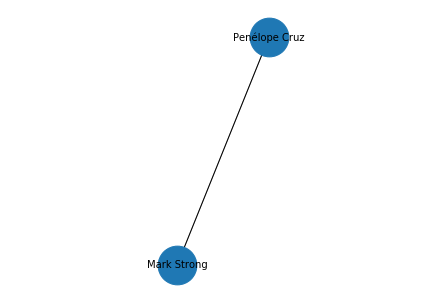

<Figure size 576x576 with 0 Axes>

,title,intro,plot,music,starring,score
0,The Man with Rain in His Shoes,\nThe Man with Rain in His Shoes is a 1998 Spa...,Victor (Henshall) is an actor in London who is...,NA,"[Lena Headey, Douglas Henshall, Penélope Cruz,...",0.4
1,The Imitation Game,\nThe Imitation Game is a 2014 American histor...,"In 1951, two policemen, Nock and Staehl, inves...",Alexandre Desplat,"[Benedict Cumberbatch, Keira Knightley, Matthe...",0.4
2,Grimsby,\nGrimsby (released in the United States as Th...,"""Nobby"" Butcher has been separated from his li...",Erran Baron Cohen\nDavid Buckley,"[Mark Strong, Rebel Wilson, Penélope Cruz, Isl...",0.4
3,Before I Go to Sleep,\nBefore I Go to Sleep is a 2014 mystery psych...,Forty-year-old Christine Lucas wakes up in bed...,Edward Shearmur,"[Nicole Kidman, Mark Strong, Colin Firth, Anne...",0.4


In [519]:
query='United States Strong Mark '
search3(query,5)